# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Irma Rohmatillah
- **Email:** Rohmatillahirma02@gmail.com
- **ID Dicoding:** irmarohmatillah31

## Menentukan Pertanyaan Bisnis

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

### Gathering Data

Load Tabel Day

In [2]:
day_df = pd.read_csv("Bike-sharing-dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Load Tabel Hour

In [3]:
hour_df = pd.read_csv("Bike-sharing-dataset/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

- Fungsi untuk melakukan penilaian

In [4]:
def assess_data(df, name):
    print(f"\n=== Penilaian untuk {name} ===")
    print("\nInformasi DataFrame:")
    print(df.info())
    
    print("\nJumlah nilai null di setiap kolom:")
    print(df.isna().sum())
    
    print("\nJumlah duplikasi:", df.duplicated().sum())
    
    print("\nStatistik Deskriptif:")
    print(df.describe(include='all'))

- Melakukan penilaian untuk dataframe day

In [5]:
assess_data(day_df, 'day_df')


=== Penilaian untuk day_df ===

Informasi DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

Jumlah nilai null di setiap kolom

Berdasarkan hasil diatas, pada tabel day_df terdapat tipe data yang tidak sesuai. Kolom dteday bisa dikonversi ke format datetime agar lebih mudah dalam analisis waktu. untuk selebihnya dataset dalam kondisi baik, tidak memiliki nilai yang hilang atau duplikasi.

- Melakukan penilaian untuk dataframe hour

In [6]:
assess_data(hour_df, 'hour_df')


=== Penilaian untuk hour_df ===

Informasi DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.

Berdasarkan hasil diatas, hour_df memiliki kesalahan tipe data pada kolom dteday yang seharusnya ber tipe data datetime. Kolom dteday bisa dikonversi ke format datetime agar lebih mudah dalam analisis waktu. untuk selebihnya dataset dalam kondisi baik, tidak memiliki nilai yang hilang atau duplikasi.

### Cleaning Data

- Konversi tipe data day_df pada kolom dteday menjadi datetime.

In [7]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [8]:

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Tipe data day_df kolom dteday berhasil dikonversi ke datetime.

- Konversi tipe data hour_df pada kolom dteday menjadi datetime.

In [9]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [10]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Tipe data hour_df kolom dteday berhasil dikonversi ke datetime.

## Exploratory Data Analysis (EDA)

### Explore ...

### Analisis Hubungan kedua tabel day_df dan hour_df

Mengambil beberapa sample dari day_df

In [11]:
sample_df = day_df.sample(n= 10, random_state= 42)
sample_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
703,704,2012-12-04,4,1,12,0,2,1,1,0.475833,0.469054,0.733750,0.174129,551,6055,6606
33,34,2011-02-03,1,0,2,0,4,1,1,0.186957,0.177878,0.437826,0.277752,61,1489,1550
300,301,2011-10-28,4,0,10,0,5,1,2,0.330833,0.318812,0.585833,0.229479,456,3291,3747
456,457,2012-04-01,2,1,4,0,0,0,2,0.425833,0.417287,0.676250,0.172267,2347,3694,6041
633,634,2012-09-25,4,1,9,0,2,1,1,0.550000,0.544179,0.570000,0.236321,845,6693,7538
557,558,2012-07-11,3,1,7,0,3,1,1,0.716667,0.650271,0.633333,0.151733,975,6289,7264
39,40,2011-02-09,1,0,2,0,3,1,2,0.134783,0.144283,0.494783,0.188839,53,1552,1605
356,357,2011-12-23,1,0,12,0,5,1,1,0.373333,0.377513,0.686250,0.274246,163,2046,2209
559,560,2012-07-13,3,1,7,0,5,1,2,0.731667,0.667933,0.485833,0.080850,1511,5988,7499
514,515,2012-05-29,2,1,5,0,2,1,1,0.722500,0.672992,0.684583,0.295400,880,4863,5743


Mengambil sample dari hour_df dengan tanggal yang sama dengan sample dari day_df

In [12]:
sample_hour_df = pd.DataFrame()
for date in sample_df['dteday']:
    temp_sample_hour_df = hour_df[hour_df['dteday'] == date]
    sample_hour_df = pd.concat([sample_hour_df, temp_sample_hour_df], ignore_index = False)
sample_hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
16709,16710,2012-12-04,4,1,12,0,0,2,1,1,0.42,0.4242,0.88,0.1045,6,49,55
16710,16711,2012-12-04,4,1,12,1,0,2,1,1,0.42,0.4242,0.82,0.1045,3,22,25
16711,16712,2012-12-04,4,1,12,2,0,2,1,1,0.42,0.4242,0.88,0.0896,3,5,8
16712,16713,2012-12-04,4,1,12,3,0,2,1,2,0.40,0.4091,0.87,0.1343,1,3,4
16713,16714,2012-12-04,4,1,12,4,0,2,1,2,0.40,0.4091,0.87,0.1343,0,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12230,12231,2012-05-29,2,1,5,19,0,2,1,1,0.78,0.7121,0.52,0.3582,69,457,526
12231,12232,2012-05-29,2,1,5,20,0,2,1,3,0.70,0.6515,0.61,0.5224,36,168,204
12232,12233,2012-05-29,2,1,5,21,0,2,1,3,0.60,0.5455,0.88,0.4478,3,68,71
12233,12234,2012-05-29,2,1,5,22,0,2,1,2,0.62,0.5606,0.88,0.0896,2,53,55


Meakukan grouping berdasarkan tanggal pada sample dari table hour_df

In [13]:
sample_day_df = sample_hour_df.groupby(by='dteday').agg({
    "temp": "mean",
    "atemp": "mean",
    "hum" : "mean",
    "windspeed" : "mean",
    "cnt" : "sum"
})
sample_day_df

,temp,atemp,hum,windspeed,cnt
dteday,,,,,
2011-02-03,0.186957,0.177878,0.437826,0.277752,1550
2011-02-09,0.134783,0.144283,0.494783,0.188839,1605
2011-10-28,0.330833,0.318812,0.585833,0.229479,3747
2011-12-23,0.373333,0.377512,0.686250,0.274246,2209
2012-04-01,0.425833,0.417288,0.676250,0.172267,6041
2012-05-29,0.722500,0.672992,0.684583,0.295400,5743
2012-07-11,0.716667,0.650271,0.633333,0.151733,7264
2012-07-13,0.731667,0.667933,0.485833,0.080850,7499
2012-09-25,0.550000,0.544179,0.570000,0.236321,7538


In [14]:
sample_df.sort_values(by= 'dteday', ascending= True)[['dteday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']]

,dteday,temp,atemp,hum,windspeed,cnt
33,2011-02-03,0.186957,0.177878,0.437826,0.277752,1550
39,2011-02-09,0.134783,0.144283,0.494783,0.188839,1605
300,2011-10-28,0.330833,0.318812,0.585833,0.229479,3747
356,2011-12-23,0.373333,0.377513,0.686250,0.274246,2209
456,2012-04-01,0.425833,0.417287,0.676250,0.172267,6041
514,2012-05-29,0.722500,0.672992,0.684583,0.295400,5743
557,2012-07-11,0.716667,0.650271,0.633333,0.151733,7264
559,2012-07-13,0.731667,0.667933,0.485833,0.080850,7499
633,2012-09-25,0.550000,0.544179,0.570000,0.236321,7538
703,2012-12-04,0.475833,0.469054,0.733750,0.174129,6606


berdasarkan hasil diatas dapat dilihat bahwa tabel day_df merupakan penggabungan dari hour_df pada tanggal yang sama

### Analisis terhadap pola penggunaan sepeda berdasarkan waktu

In [15]:
hour_in_day_df = hour_df.groupby(by= ['workingday', 'hr']).agg({
    "cnt":["sum", "mean", "median", "min", "max"]
}).reset_index()
hour_in_day_df.columns = ["_".join(col).strip() for col in hour_in_day_df.columns.values]

In [16]:
hour_in_day_df

,workingday_,hr_,cnt_sum,cnt_mean,cnt_median,cnt_min,cnt_max
0,0,0,20884,90.800000,93.5,6,249
1,0,1,15987,69.508696,71.0,4,168
2,0,2,12123,53.171053,54.0,2,132
3,0,3,5851,25.775330,25.0,2,79
4,0,4,1876,8.264317,7.0,1,28
5,0,5,1929,8.689189,7.0,1,55
6,0,6,4292,18.742358,16.0,1,133
7,0,7,10027,43.406926,39.0,1,387
8,0,8,24406,105.653680,94.0,5,597
9,0,9,39645,171.623377,170.0,14,397


In [17]:
hour_in_day_df[hour_in_day_df['workingday_'] == 0].nlargest(3, 'cnt_mean')

,workingday_,hr_,cnt_sum,cnt_mean,cnt_median,cnt_min,cnt_max
13,0,13,86101,372.731602,367.0,30,760
12,0,12,84606,366.259740,367.0,32,776
14,0,14,84233,364.645022,361.0,23,750


In [18]:
hour_in_day_df[hour_in_day_df['workingday_'] == 1].nlargest(3, 'cnt_mean')

,workingday_,hr_,cnt_sum,cnt_mean,cnt_median,cnt_min,cnt_max
41,1,17,262120,525.290581,539.0,26,976
42,1,18,245129,492.226908,504.5,26,977
32,1,8,236595,477.006048,463.0,31,839


Dari hasil diatas dapat diketahui waktu penggunaan sepeda terbanyak di hari kerja terdapat pada sore hari (pukul 17 dan 18) dan pagi hari (pukul 8). Dan penggunaan sepeda terbanyak diluar hari kerja terdapat pada siang hari (pukul 12, 13, 14)

In [19]:
hour_in_day_df[hour_in_day_df['workingday_'] == 0].nsmallest(3, 'cnt_mean')

,workingday_,hr_,cnt_sum,cnt_mean,cnt_median,cnt_min,cnt_max
4,0,4,1876,8.264317,7.0,1,28
5,0,5,1929,8.689189,7.0,1,55
6,0,6,4292,18.742358,16.0,1,133


In [20]:
hour_in_day_df[hour_in_day_df['workingday_'] == 1].nsmallest(3, 'cnt_mean')

,workingday_,hr_,cnt_sum,cnt_mean,cnt_median,cnt_min,cnt_max
27,1,3,2323,4.942553,4.0,1,36
28,1,4,2552,5.429787,5.0,1,17
26,1,2,4229,8.683778,7.0,1,74


Jumlah penggunaan sepeda paling rendah pada hari kerja terjadi pada dini hari (pukul 2, 3, 4), sedangkan pada bukan hari kerja, jumlah pengguna sepeda paling sedikit tercatat pada pagi hari (pukul 4, 5, 6).

### Analisis tren tiap Bulan

In [21]:
monthly_df = day_df.groupby(by= ["yr","mnth"]).agg({
    "cnt":["sum","mean", "median", "min", "max"]
}).reset_index()
monthly_df.columns = ["_".join(col).strip() for col in monthly_df.columns.values]

In [22]:
monthly_df

,yr_,mnth_,cnt_sum,cnt_mean,cnt_median,cnt_min,cnt_max
0,0,1,38189,1231.903226,1248.0,431,1985
1,0,2,48215,1721.964286,1629.0,1005,2927
2,0,3,64045,2065.967742,2077.0,605,3239
3,0,4,94870,3162.333333,3226.5,795,5312
4,0,5,135821,4381.322581,4451.0,2633,5805
5,0,6,143512,4783.733333,4839.5,3767,5515
6,0,7,141341,4559.387097,4541.0,3285,6043
7,0,8,136691,4409.387097,4602.0,1115,5895
8,0,9,127418,4247.266667,4584.5,1842,5423
9,0,10,123511,3984.225806,4304.0,627,5511


In [23]:
seasonal_df = day_df.groupby(by= ["yr","season"]).agg({
    "cnt":["sum","mean", "median", "min", "max"]
}).reset_index()

seasonal_df.columns = ["_".join(col).strip() for col in seasonal_df.columns.values]

seasonal_df["yr_"] = seasonal_df['yr_'].replace({
    0: 2011,
    1: 2012
})

seasonal_df['season_'] = seasonal_df['season_'].replace({
    1: "Springer",
    2: "Summer",
    3: "Fall",
    4: "Winter"
})

In [24]:
seasonal_df

,yr_,season_,cnt_sum,cnt_mean,cnt_median,cnt_min,cnt_max
0,2011,Springer,150000,1666.666667,1602.5,431,3239
1,2011,Summer,347316,3775.173913,4085.5,795,5805
2,2011,Fall,419650,4464.361702,4615.5,1115,6043
3,2011,Winter,326137,3664.460674,3717.0,627,5511
4,2012,Springer,321348,3531.296703,3456.0,441,7836
5,2012,Summer,571273,6209.489130,6384.0,1027,8362
6,2012,Fall,641479,6824.244681,6941.5,4073,8714
7,2012,Winter,515476,5791.865169,5629.0,22,8555


Dapat diamati bahwa jumlah penggunaan sepeda meningkat setiap bulan, namun mengalami penurunan pada bulan 10 hingga 12. Penggunaan sepeda tertinggi terjadi pada musim gugur (fall season - 3), dengan kategori musim sebagai berikut: 1 (spring), 2 (summer), 3 (fall), dan 4 (winter).

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penyewaan sepeda dari waktu ke waktu?

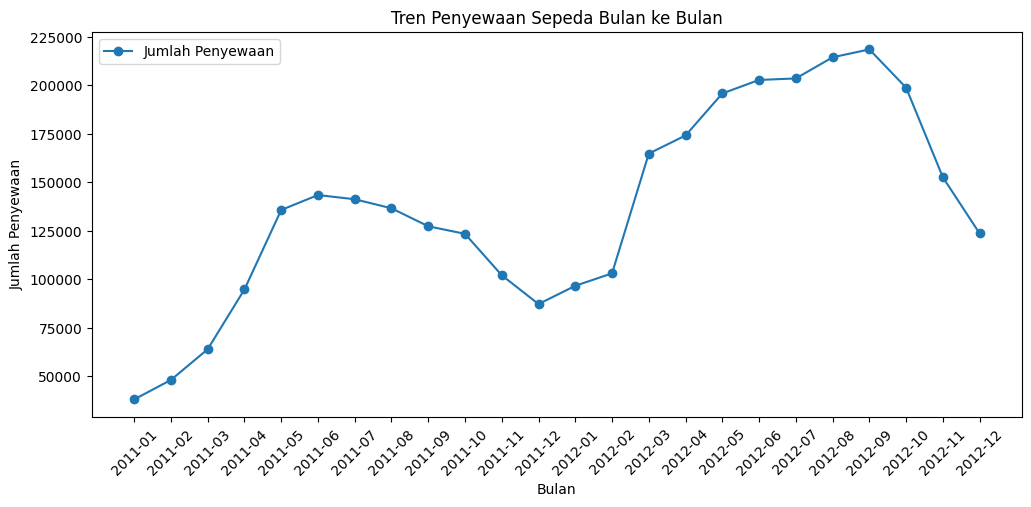

In [25]:
day_df['month'] = day_df['dteday'].dt.to_period("M")
monthly_trend = day_df.groupby('month')['cnt'].sum()
plt.figure(figsize=(12, 5))
plt.plot(monthly_trend.index.astype(str), monthly_trend.values, marker='o', label='Jumlah Penyewaan')
plt.xticks(rotation=45)
plt.title('Tren Penyewaan Sepeda Bulan ke Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan')
plt.legend()
plt.show()

- Terlihat adanya fluktuasi dalam jumlah penyewaan sepeda setiap bulan, dengan kemungkinan adanya pola musiman.
- Pada bulan-bulan tertentu, jumlah penyewaan cenderung meningkat, yang mungkin terkait dengan kondisi cuaca yang lebih nyaman atau periode liburan.


### Pertanyaan 2:Pada Kondisi apa saja terjadi peningkatan jumlah rental sepeda?

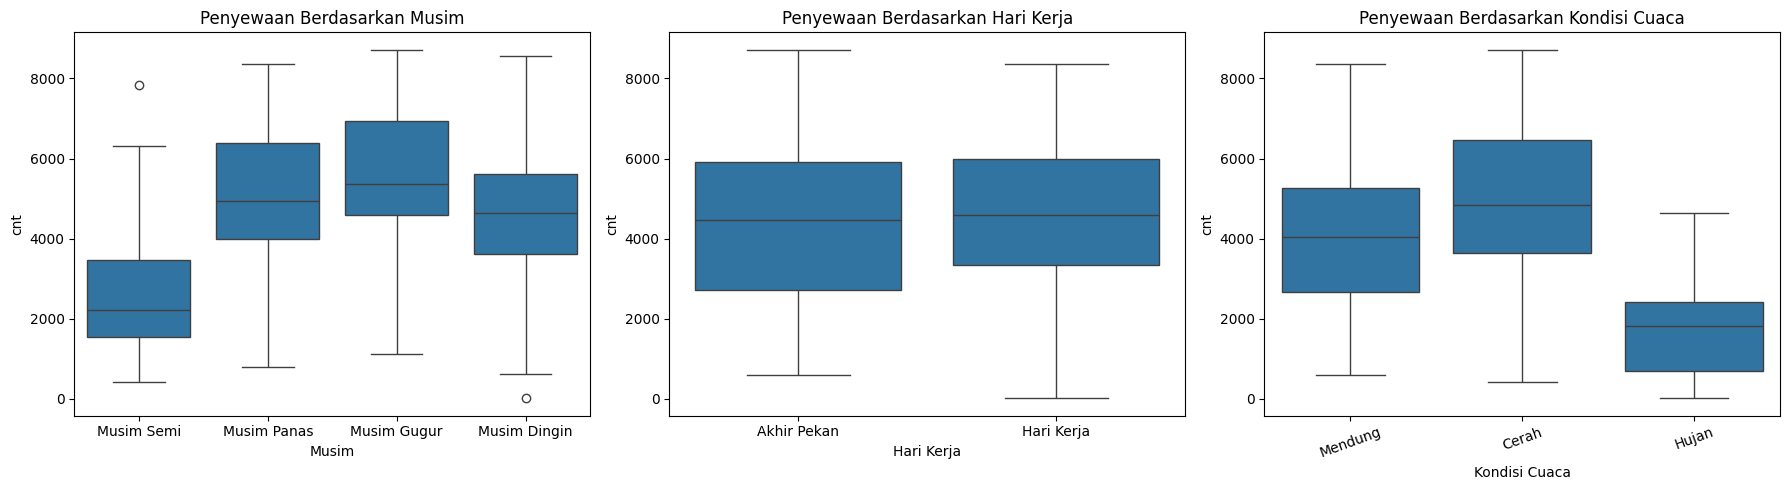

In [26]:
# Mengubah label kategori menjadi lebih deskriptif
season_labels = {1: "Musim Semi", 2: "Musim Panas", 3: "Musim Gugur", 4: "Musim Dingin"}
workingday_labels = {0: "Akhir Pekan", 1: "Hari Kerja"}
weathersit_labels = {1: "Cerah", 2: "Mendung", 3: "Hujan", 4: "Cuaca Ekstrem"}

day_df['season_label'] = day_df['season'].map(season_labels)
day_df['workingday_label'] = day_df['workingday'].map(workingday_labels)
day_df['weathersit_label'] = day_df['weathersit'].map(weathersit_labels)

# Visualisasi dengan label kategori yang lebih jelas
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.boxplot(x='season_label', y='cnt', data=day_df, ax=axes[0])
axes[0].set_title('Penyewaan Berdasarkan Musim')
axes[0].set_xlabel('Musim')

sns.boxplot(x='workingday_label', y='cnt', data=day_df, ax=axes[1])
axes[1].set_title('Penyewaan Berdasarkan Hari Kerja')
axes[1].set_xlabel('Hari Kerja')

sns.boxplot(x='weathersit_label', y='cnt', data=day_df, ax=axes[2])
axes[2].set_title('Penyewaan Berdasarkan Kondisi Cuaca')
axes[2].set_xlabel('Kondisi Cuaca')

plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

Peningkatan jumlah rental sepeda terjadi pada:  
1. Musim Panas & Gugur – Penyewaan lebih tinggi dibandingkan musim semi dan dingin.  
2. Hari Kerja & Akhir Pekan – Distribusi penyewaan relatif seimbang, tetapi lebih tinggi pada jam sibuk hari kerja.  
3. Cuaca Cerah & Mendung – Penyewaan lebih tinggi dibandingkan saat hujan, yang menunjukkan pengaruh cuaca terhadap keputusan pengguna.

### Pertanyaan 3: Faktor apa saja yang paling mempengaruhi jumlah penyewaan sepeda?

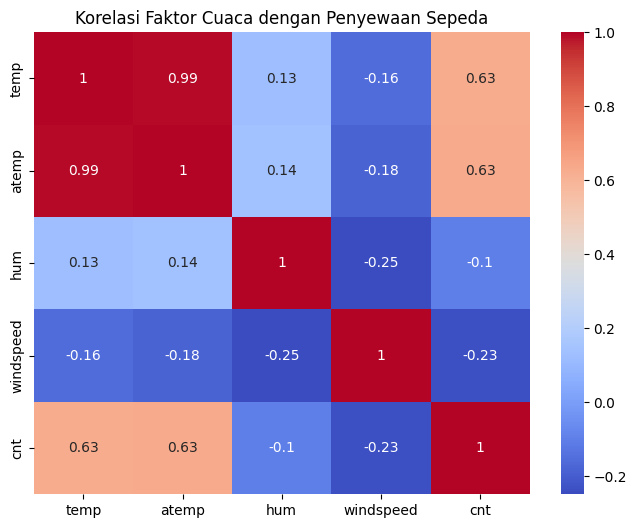

In [27]:
correlation_matrix = day_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasi Faktor Cuaca dengan Penyewaan Sepeda')
plt.show()

- Suhu memiliki korelasi positif yang cukup kuat dengan jumlah penyewaan sepeda, artinya semakin nyaman suhu, semakin banyak orang menyewa sepeda.
- Kelembaban dan kecepatan angin memiliki korelasi yang lebih lemah terhadap penyewaan sepeda, menunjukkan bahwa faktor ini tidak terlalu signifikan dibandingkan suhu.


### Pertanyaan 4: Bagaimana hubungan cuaca terhadap jumlah rental sepeda?

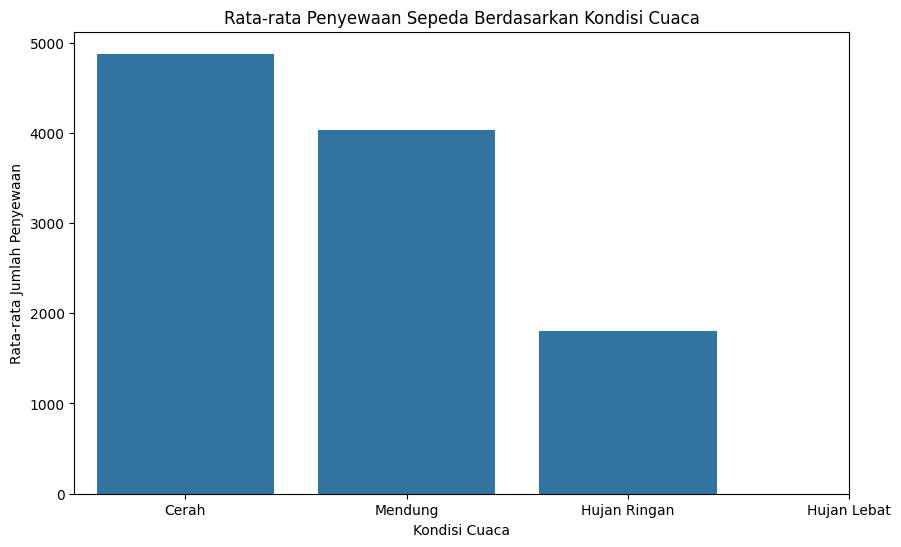

In [28]:
weather_cnt = day_df.groupby('weathersit', as_index=False)['cnt'].mean()
weather_cnt.rename(columns={'cnt': 'cnt_mean'}, inplace=True)
plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit', y='cnt_mean', data=weather_cnt)
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Cerah', 'Mendung', 'Hujan Ringan', 'Hujan Lebat'])
plt.show()

Dari grafik yang ditampilkan, terlihat bahwa kondisi cuaca memiliki dampak yang signifikan terhadap jumlah penyewaan sepeda. Semakin buruk kondisi cuaca, semakin rendah jumlah penyewaan sepeda. Ini menunjukkan bahwa faktor cuaca sangat berpengaruh terhadap keputusan pengguna untuk menyewa sepeda.

### Pertanyaan 5: Bagaimana pola penyewaan sepeda berdasarkan jam (hr) dalam sehari?

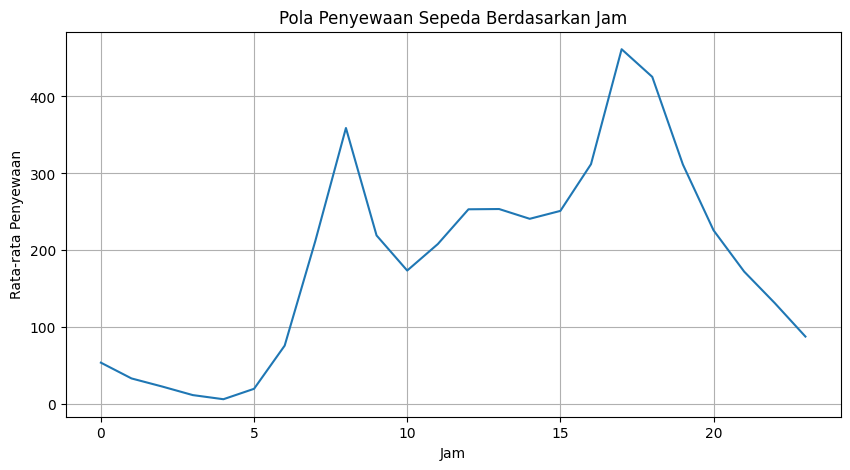

In [29]:
hourly_trend = hour_df.groupby('hr')['cnt'].mean()
plt.figure(figsize=(10, 5))
hourly_trend.plot()
plt.title('Pola Penyewaan Sepeda Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Penyewaan')
plt.grid()
plt.show()

Penyewaan sepeda mencapai puncak pada pagi (sekitar pukul 8) dan sore hari (sekitar pukul 17-18), mencerminkan jam sibuk perjalanan kerja. Sementara itu, jumlah penyewaan rendah pada tengah malam hingga dini hari.

## Conclusion

- Conclusion pertanyaan 1:
Tren penyewaan sepeda menunjukkan pola musiman yang cukup jelas. Dari grafik, terlihat adanya peningkatan signifikan dalam jumlah penyewaan sepeda selama awal tahun 2011 hingga pertengahan tahun 2011, sebelum mengalami sedikit penurunan di akhir tahun. Tren serupa juga terjadi pada tahun 2012, dengan lonjakan penyewaan pada bulan-bulan tertentu.
- Conclusion pertanyaan 2: Peningkatan jumlah penyewaan sepeda terutama terjadi pada musim panas dan musim gugur, di mana jumlah penyewaan terlihat lebih tinggi dibandingkan dengan musim semi dan musim dingin. Hal ini kemungkinan disebabkan oleh cuaca yang lebih nyaman serta meningkatnya aktivitas luar ruangan. Selain itu, penyewaan sepeda cenderung tinggi baik pada hari kerja maupun akhir pekan, meskipun akhir pekan menunjukkan variasi yang lebih besar, mengindikasikan bahwa banyak orang menggunakan sepeda untuk keperluan rekreasi. Dari segi kondisi cuaca, penyewaan sepeda mencapai puncaknya saat cuaca cerah, tetap cukup tinggi saat mendung, tetapi menurun drastis saat hujan. Hal ini menunjukkan bahwa faktor cuaca sangat berpengaruh terhadap minat masyarakat dalam menyewa sepeda.
- Conclusion pertanyaan 3: Berdasarkan heatmap korelasi di atas, faktor yang paling memengaruhi jumlah penyewaan sepeda (cnt) adalah suhu udara (temp) dan suhu yang dirasakan (atemp) dengan korelasi sebesar 0.63. Hal ini menunjukkan bahwa semakin tinggi suhu, semakin banyak pula jumlah sepeda yang disewa, kemungkinan karena cuaca yang lebih nyaman untuk bersepeda.  
Sebaliknya, kelembaban udara (hum) dan kecepatan angin (windspeed) memiliki korelasi negatif terhadap penyewaan sepeda, masing-masing sebesar -0.10 dan -0.23. Ini menunjukkan bahwa saat kelembaban tinggi atau angin bertiup lebih kencang, jumlah penyewaan sepeda cenderung menurun, mungkin karena kondisi tersebut kurang nyaman atau lebih berisiko bagi pengendara sepeda.  
Dengan demikian, suhu udara menjadi faktor yang paling berpengaruh terhadap jumlah penyewaan sepeda, sementara faktor kelembaban dan kecepatan angin memiliki pengaruh yang lebih kecil namun tetap berkontribusi terhadap variasi jumlah penyewaan.
- Conclusion pertanyaan 4: Berdasarkan hasil analisis di atas, terdapat hubungan yang jelas antara kondisi cuaca dengan jumlah penyewaan sepeda. Cuaca cerah memiliki jumlah penyewaan tertinggi, diikuti oleh kondisi mendung yang masih cukup tinggi, meskipun sedikit lebih rendah dibandingkan cuaca cerah. Namun, ketika kondisi cuaca beralih ke hujan ringan, jumlah penyewaan sepeda mengalami penurunan yang cukup signifikan.  
Selain itu, tidak terlihat adanya data untuk hujan lebat, yang kemungkinan besar menunjukkan bahwa hampir tidak ada atau sangat sedikit orang yang menyewa sepeda dalam kondisi tersebut. Secara keseluruhan, cuaca yang lebih baik (cerah dan mendung) cenderung meningkatkan jumlah penyewaan sepeda, sementara kondisi hujan, terutama hujan deras, menyebabkan penurunan drastis dalam jumlah penyewaan.
-Conclusin pertanyaan 5: Berdasarkan hasil di atas, pola penyewaan sepeda dalam sehari menunjukkan dua puncak utama. Peningkatan signifikan pertama terjadi pada pagi hari sekitar pukul 07:00 - 09:00, yang kemungkinan besar berhubungan dengan jam berangkat kerja atau sekolah. Setelah itu, jumlah penyewaan menurun dan relatif stabil sepanjang siang hari.  
Peningkatan kedua terjadi pada sore hingga malam hari, sekitar pukul 17:00 - 19:00, yang mungkin terkait dengan jam pulang kerja atau waktu santai setelah aktivitas sehari-hari. Setelah pukul 19:00, jumlah penyewaan mulai menurun secara bertahap hingga mencapai titik terendah pada tengah malam dan dini hari.  
Secara keseluruhan, pola ini menunjukkan bahwa penyewaan sepeda cenderung meningkat pada jam-jam sibuk (pagi dan sore), sementara jumlah penyewaan lebih rendah pada malam dan dini hari.